#### Case 1: Isobaric evaporation of liquid hydrogen in a 4.89 $m^3$ spherical tank experiments.

This notebook sets up the isobaric evaporation of liquid hydrogen ($LH_2$) in a 4.89 $m^3$ storage tank. A high liquid filling, high heat ingress scenario from Hasan (1991) is considered. This tank is representative of lab-scale tanks used for cryogen evaporation experiments that measure boil-off rates and thermal stratification.

In [29]:
# Ensure that python finds the submodules
import sys
sys.path.append("..") # Adds higher directory to python modules path.

# Scientific computing
import numpy as np

# Visualisation
import matplotlib.pyplot as plt

## Module imports
# Import the storage tank Class
from cryoevap.storage_tanks import Tank

# Import Cryogen class
from cryoevap.cryogens import Cryogen

from scipy.integrate import simps

from mpltools import annotation

#### Setup tank and cryogen properties

In [30]:
# LNG tank properties
Q_roof = 0 # Roof heat ingress / W
d_i = 2.106 # Internal diameter / m
d_o = 2.106+2.08e-3   # External diameter / m
T_air = 350 # Temperature of the environment K

# Set overall heat transfer coefficient through the walls for liquid and vapour
U_L = 0.01063*10 # W/m2/K up to 0.1-0.2
U_V = 0.01063*10 # W/m2/K

# Specify heat transfer rate at the bottom to prevent ground heating
Q_b = 0 # W, 

# Spherical tank volume
V_tank = 4.89 #m^3

# Initial liquid filling / Dimensionless
LF = 0.95

# Specify tank operating pressure
P = 117e3 # Pa

Geo_v1 = "spherical"
Geo_l1 = "spherical"

Geo_v2 = "cylindrical"
Geo_l2 = "cylindrical"

# Initialize large-scale tank
small_tank1 = Tank(d_i, d_o, V_tank, Geo_v1, Geo_l1,LF)
small_tank1.set_HeatTransProps(U_L, U_V, T_air, Q_b, Q_roof, eta_w = 0.95)

small_tank2 = Tank(d_i, d_o, V_tank, Geo_v2, Geo_l2,LF)
small_tank2.set_HeatTransProps(U_L, U_V, T_air, Q_b_fixed=None, Q_roof=Q_roof, eta_w = 0.95)

# Initialise cryogen
hydrogen1 = Cryogen(name = "hydrogen")
hydrogen1.set_coolprops(P)

hydrogen2 = Cryogen(name='hydrogen')
hydrogen2.set_coolprops(P)

# Set cryogen
small_tank1.cryogen = hydrogen1
small_tank2.cryogen = hydrogen2

# Calculate initial evaporation rate
print("The initial evaporation rate of " + hydrogen1.name + " is %.1e kg/h" % (small_tank1.b_l_dot * 3600))
print("The initial evaporation rate of " + hydrogen2.name + " is %.1e kg/h" % (small_tank2.b_l_dot * 3600))

The initial evaporation rate of hydrogen is 3.9e+00 kg/h
The initial evaporation rate of hydrogen is 4.5e+00 kg/h


Calculate initial evaporation rate and transient period

In [31]:
# Calculate initial evaporation rate
print("The initial evaporation rate of " + hydrogen1.name + " is %.1e kg/h" % (small_tank1.b_l_dot * 3600))

# Estimate transient period duration
print("Transient period = %.3f s " % small_tank1.tau)

# Minimum number of hours to achieve steady state 
tau_h1 = (np.floor(small_tank1.tau / 3600) + 1)

# Print simulation time of the transient period for short-term storage
print("Simulation time: %.0i h" % tau_h1 )

# Calculate boil-off rate
BOR1 = (small_tank1.b_l_dot * 24 * 3600) / (small_tank1.V * small_tank1.LF * small_tank1.cryogen.rho_L)
print("BOR = %.3f %%" % (BOR1 * 100))
print('Area = ',small_tank1.A_T)
print("vz at t=0 = ", small_tank1.v_z,'\n')

# Calculate initial evaporation rate
print("The initial evaporation rate of " + hydrogen2.name + " is %.1e kg/h" % (small_tank2.b_l_dot * 3600))

# Estimate transient period duration
print("Transient period = %.3f s " % small_tank2.tau)

# Minimum number of hours to achieve steady state 
tau_h2 = (np.floor(small_tank2.tau / 3600) + 1)

# Print simulation time of the transient period for short-term storage
print("Simulation time: %.0i h" % tau_h2 )

# Calculate boil-off rate
BOR2 = (small_tank2.b_l_dot * 24 * 3600) / (small_tank2.V * small_tank2.LF * small_tank2.cryogen.rho_L)
print("BOR = %.3f %%" % (BOR2 * 100))
print('Area = ',small_tank2.A_T)
print("vz at t=0 = ", small_tank2.v_z)

The initial evaporation rate of hydrogen is 3.9e+00 kg/h
Transient period = 650.506 s 
Simulation time: 1 h
BOR = 28.773 %
Area =  1.632721754047319
vz at t=0 =  0.00043884783278136765 

The initial evaporation rate of hydrogen is 4.5e+00 kg/h
Transient period = 294.389 s 
Simulation time: 1 h
BOR = 33.352 %
Area =  3.4834262086342447
vz at t=0 =  0.0002384246265744759


#### Simulation setup and execution

In [32]:
# Define vertical spacing
dz = 0.01

# Calculate number of nodes
n_z = 1 + int(np.round(small_tank1.l_V/dz, 0))

# Define dimensionless computational grid
small_tank1.z_grid = np.linspace(0, 1, n_z)

# Insulated roof
small_tank1.U_roof = 0

# Define evaporation time as twice as the transient period
#evap_time = 3600 *tau_h1*2
evap_time = 3600*1

# Time step to record data, relevant for plotting integrated quantities
# such as the vapour to liquid heat transfer rate, Q_VL
small_tank1.time_interval = 60

# Time step to plot each vapour temperature profile
small_tank1.plot_interval = evap_time/6

# Simulate the evaporation
small_tank1.evaporate(evap_time)

# Calculate number of nodes
n_z2 = 1 + int(np.round(small_tank2.l_V/dz, 0))

# Define dimensionless computational grid
small_tank2.z_grid = np.linspace(0, 1, n_z2)

# Insulated roof
small_tank2.U_roof = 0

# Define evaporation time as twice as the transient period
#evap_time = 3600 *tau_h1*2
evap_time = 3600*1

# Time step to record data, relevant for plotting integrated quantities
# such as the vapour to liquid heat transfer rate, Q_VL
small_tank2.time_interval = 60

# Time step to plot each vapour temperature profile
small_tank2.plot_interval = evap_time/6

# Simulate the evaporation
small_tank2.evaporate(evap_time)

/home/aeb23/IRP/CryoEvap/notebooks/../cryoevap/storage_tanks/tank.py:472: RuntimeWarning: divide by zero encountered in divide
  vz = self.v_z*(l_L[i]/zed)*(2*self.d_i/2 - l_L[i])/(2*self.d_i/2 - zed)


#### Visualisation of results

#### Vapour temperature

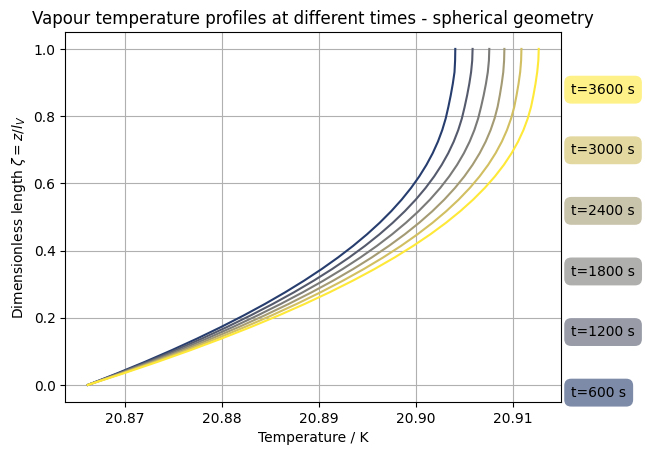

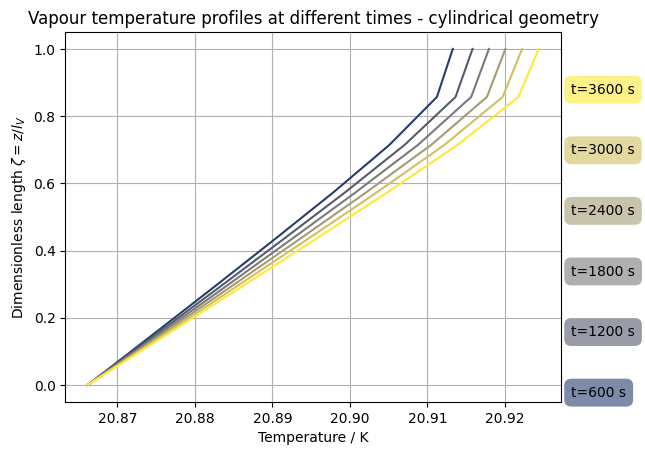

In [33]:
# Visualise the plot
small_tank1.plot_tv()
#plt.ylim((0,0.3))
#plt.xlim((20.86,21))
small_tank2.plot_tv()
#plt.xlim((20.86,21))

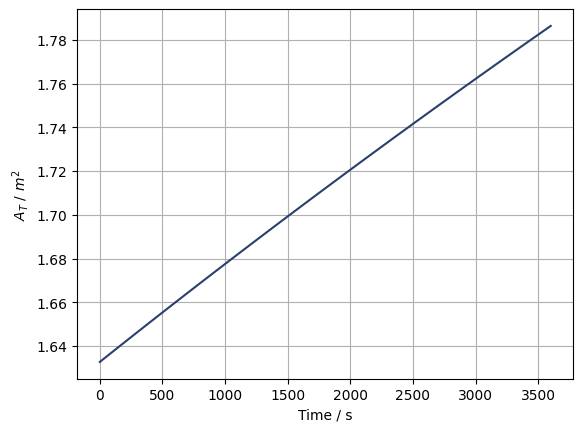

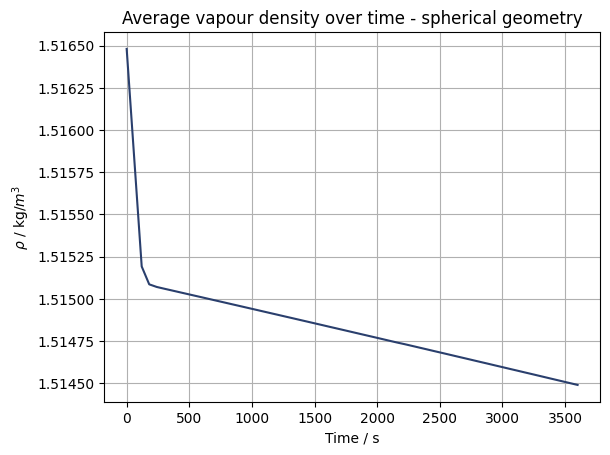

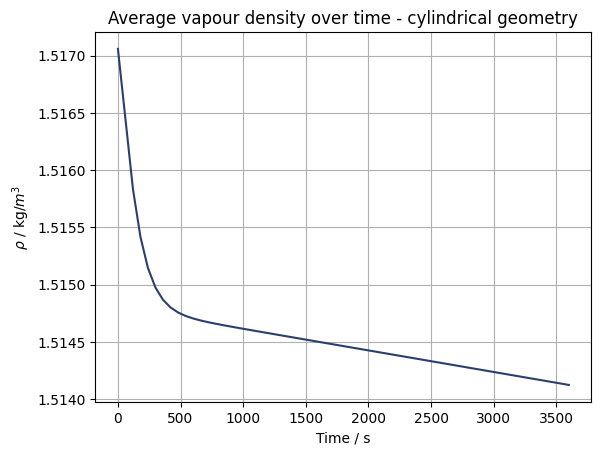

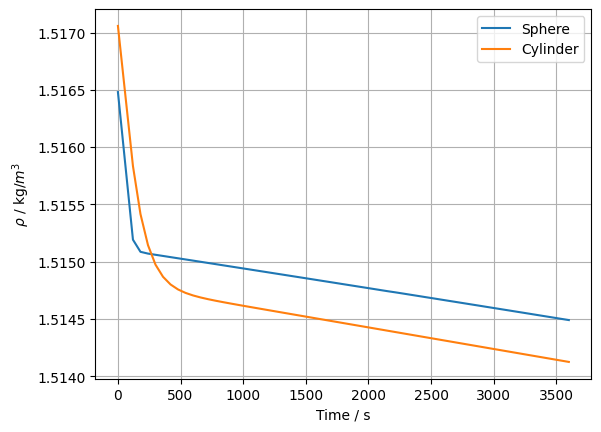

In [34]:
small_tank1.plot_A_T()
small_tank1.plot_rho_V_avg()
small_tank2.plot_rho_V_avg()
plt.plot(small_tank1.data['Time'],small_tank1.data['rho_V_avg'],small_tank2.data['Time'],small_tank2.data['rho_V_avg'])
plt.legend(['Sphere','Cylinder'])
plt.xlabel('Time / s')
plt.ylabel(r'$\rho$ / kg/$m^3$')
plt.grid(True)

Visualise liquid and vapour heat ingresses, $\dot{Q}_{\text{L}}$ and  $\dot{Q}_{\text{V}}$.

The plot also shows the vapour to liquid heat ingress, $\dot{Q}_{VL}$, and  the partition of the vapour heat ingress that is transferred to the interface by the wall directly, $\dot{Q}_{\text{V,w}}$

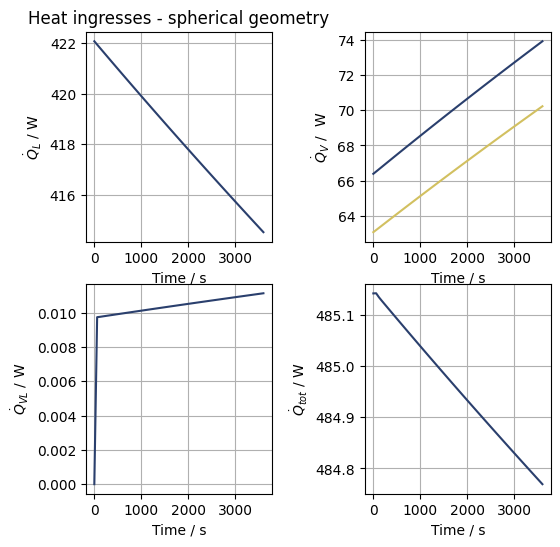

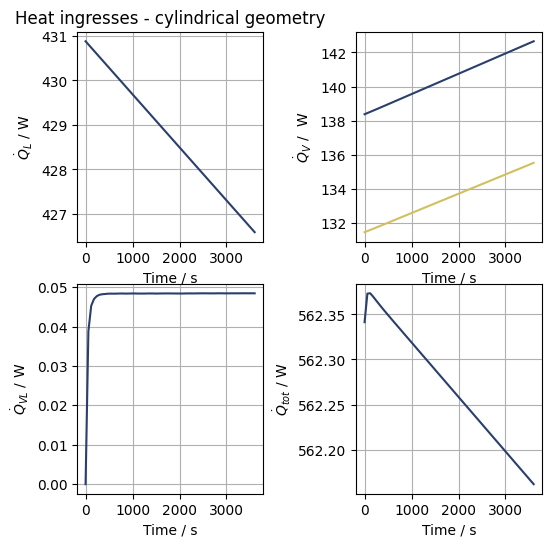

In [35]:
# Provide optional parameter unit to
# accommodate the scale of the experiment
small_tank1.plot_Q(unit="W")
small_tank2.plot_Q(unit='W')

#### Plot liquid volume

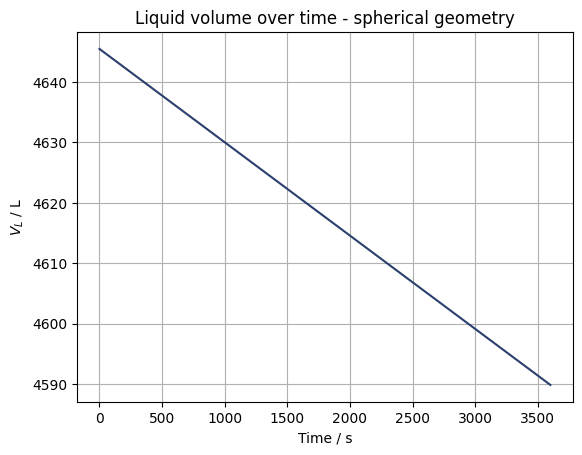

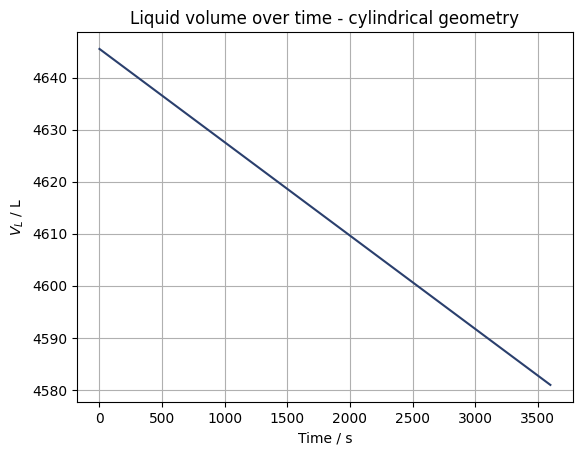

Text(0, 0.5, '$V_L$ / $m^3$')

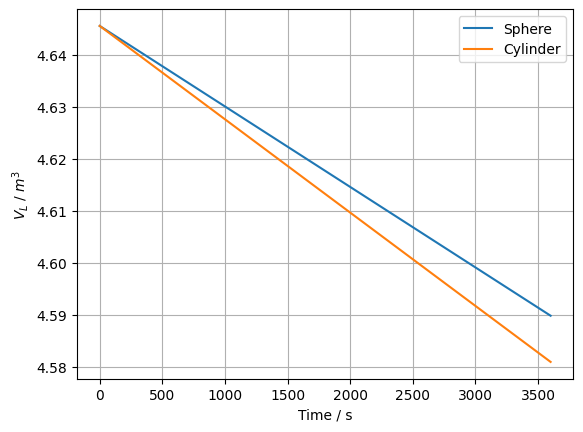

In [36]:
# Provide optional parameter unit to
# accommodate the scale of the experiment
small_tank1.plot_V_L(unit="L")
small_tank2.plot_V_L(unit='L')
plt.plot(small_tank1.data['Time'],small_tank1.data['V_L'],small_tank2.data['Time'],small_tank2.data['V_L'])
plt.grid(True)
plt.legend(['Sphere','Cylinder'])
plt.xlabel('Time / s')
plt.ylabel('$V_L$ / $m^3$')

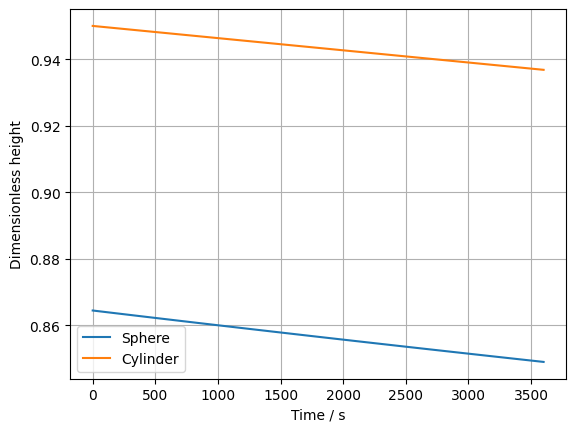

In [37]:
plt.plot(small_tank1.data['Time'],small_tank1.data['z']/d_i,small_tank2.data['Time'],small_tank2.data['z']*np.pi*d_i**2 / (4 * V_tank))
plt.grid(True)
plt.xlabel('Time / s')
plt.ylabel('Dimensionless height')
plt.legend(['Sphere','Cylinder'])

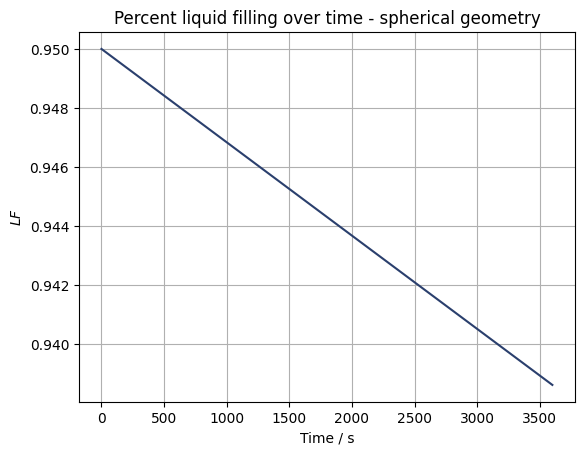

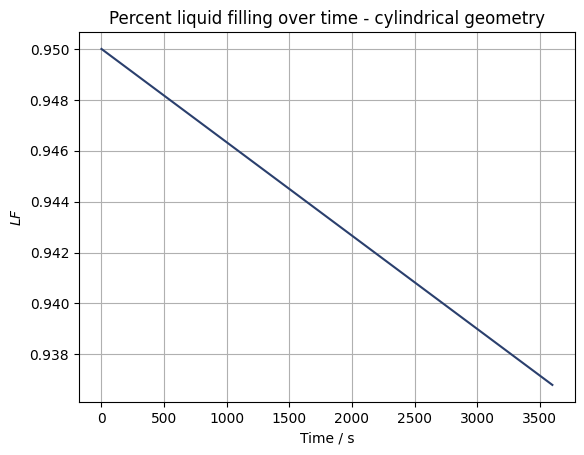

Text(0, 0.5, 'LF')

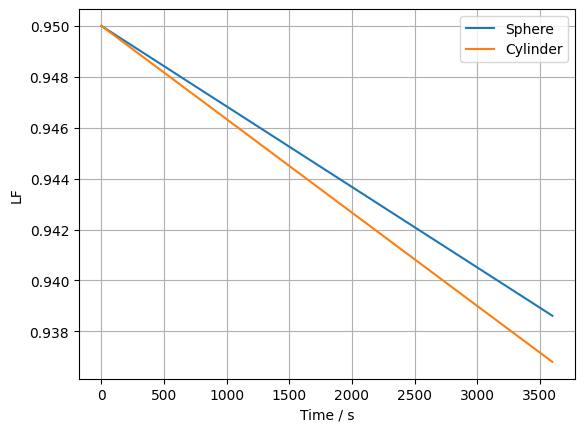

In [38]:
small_tank1.plot_LF()
small_tank2.plot_LF()
plt.plot(small_tank1.data['Time'],small_tank1.data['LF'],small_tank2.data['Time'],small_tank2.data['LF'])
plt.legend(['Sphere','Cylinder'])
plt.grid(True)
plt.xlabel('Time / s')
plt.ylabel('LF')

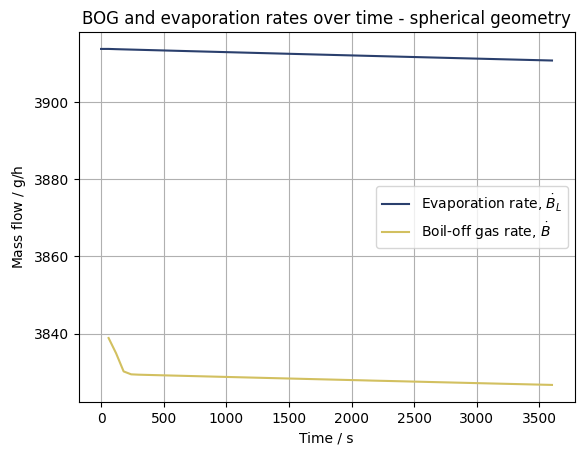

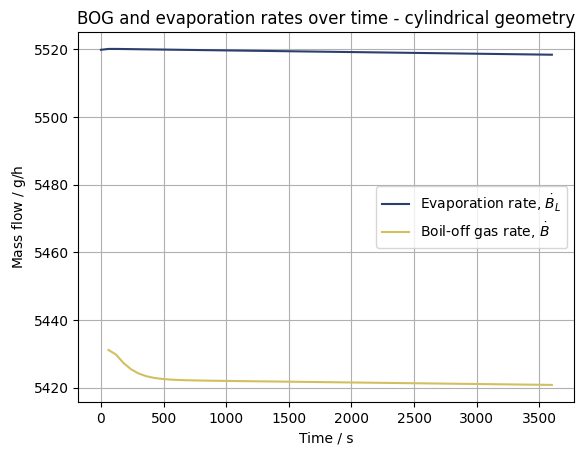

In [39]:
# Provide optional parameter unit to
# accommodate the scale of the experiment
small_tank1.plot_BOG(unit='g/h')
small_tank2.plot_BOG(unit='g/h')

/home/aeb23/IRP/CryoEvap/notebooks/../cryoevap/storage_tanks/plots.py:258: RuntimeWarning: divide by zero encountered in divide
  v_z = tank.v_z*(height/zed)*(2*tank.d_i/2 - height)/(2*tank.d_i/2 - zed)


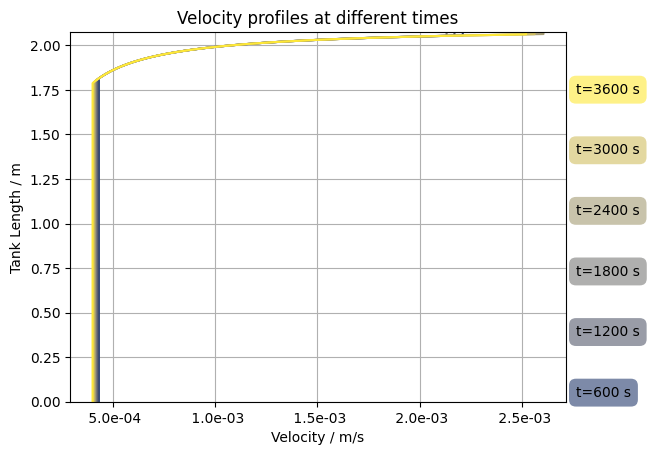

In [40]:
small_tank1.plot_vz()

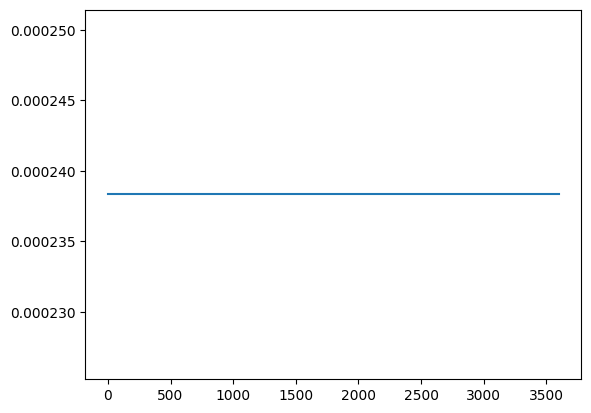

In [41]:
plt.plot(small_tank2.data['Time'],small_tank2.data['vz'])

In [42]:
small_tank1.data["Pressure"] = np.ones_like(small_tank1.data["B_L"])*P
air = P*(V_tank*(1-LF))/(8.314*hydrogen1.T_sat)
for i in range(1,len(small_tank1.data["B_L"])):
    small_tank1.data["Pressure"][i] = ((simps(small_tank1.data["B_L"][:i])*(1000/2) +air)*8.314*small_tank1.data["Tv_avg"][i])/(V_tank - small_tank1.data["V_L"][i])

Optional: CSV data export

If evaporation data is intended to be post-processed in another software, it can be exported readily with the help of the Pandas package.

In [43]:
# Import pandas 
import pandas as pd

In [44]:
# Create dataframe from dictionary
df_evap = pd.DataFrame.from_dict(small_tank1.data)
df_evap2 = pd.DataFrame.from_dict(small_tank2.data)
# Save file to the current working directory
df_evap.to_csv('LN2_small_m3.csv')

In [45]:
df_evap['flux_v'] = df_evap["Q_V"]/(np.pi*d_i*(d_i-df_evap['z']))
df_evap['flux_l'] = df_evap["Q_L"]/(np.pi*d_i*(df_evap['z']))
df_evap['total_flux'] = (df_evap['Q_L']+df_evap['Q_V'])/(np.pi*d_i**2)

In [46]:
df_evap["SCHM BOG"] = ((df_evap["BOG"]*1000*3600/2)*(273+15)*8.314)/101325
df_evap2["SCHM BOG"] = ((df_evap2["BOG"]*1000*3600/2)*(273+15)*8.314)/101325
df_evap[-5:]

,Time,Tv_avg,rho_V_avg,Q_VL,Q_L,Q_V,V_L,B_L,BOG,drho_V_avg,...,vz_avg,vz,LF,dTV_avg,Q_Vw,Pressure,flux_v,flux_l,total_flux,SCHM BOG
56,3360,20.894788,1.514533,0.011044,415.012474,73.442048,4.593537,0.001086,0.001063,-1.761204e-07,...,0.000692,0.000403,0.939374,0.000002,69.769945,114137.649434,35.133706,35.041826,35.055610,45.216956
57,3420,20.894897,1.514522,0.011067,414.891591,73.562896,4.592610,0.001086,0.001063,-1.759111e-07,...,0.000691,0.000402,0.939184,0.000002,69.884751,114099.555119,35.133505,35.041832,35.055607,45.216403
58,3480,20.895007,1.514512,0.011090,414.770874,73.683578,4.591682,0.001086,0.001063,-1.758652e-07,...,0.000690,0.000402,0.938994,0.000002,69.999399,114061.702254,35.133304,35.041838,35.055605,45.215852
59,3540,20.895116,1.514501,0.011113,414.650321,73.804096,4.590755,0.001086,0.001063,-1.756607e-07,...,0.000689,0.000401,0.938805,0.000002,70.113891,114024.086762,35.133104,35.041844,35.055602,45.215300
60,3600,20.895226,1.514490,0.011135,414.529931,73.924450,4.589827,0.001086,0.001063,-1.755666e-07,...,0.000688,0.000401,0.938615,0.000002,70.228228,113986.707180,35.132905,35.041850,35.055600,45.214750


In [47]:
df_evap2.columns

Index(['Time', 'Tv_avg', 'rho_V_avg', 'Q_VL', 'Q_L', 'Q_V', 'V_L', 'B_L',
       'BOG', 'drho_V_avg', 'dV_L', 'z', 'vz', 'LF', 'dTV_avg', 'Q_Vw',
       'SCHM BOG'],
      dtype='object')

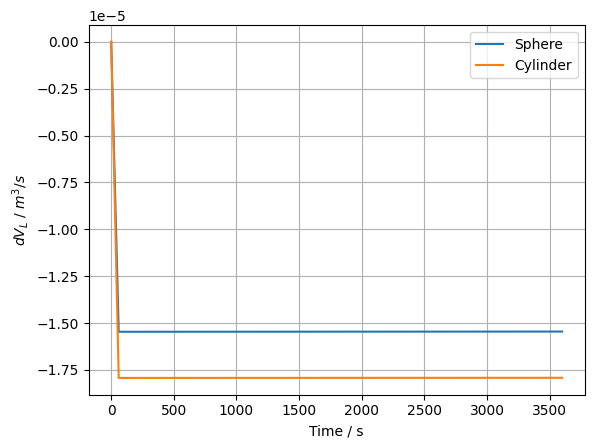

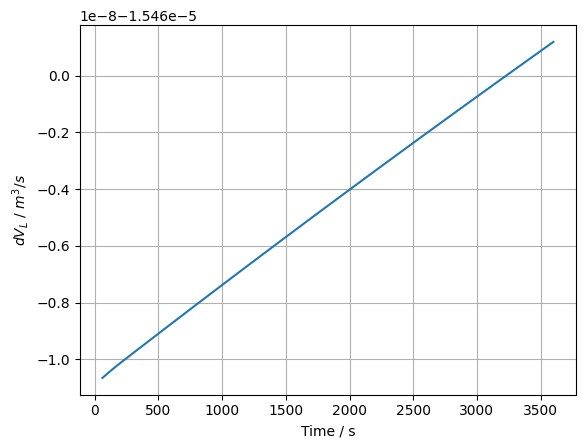

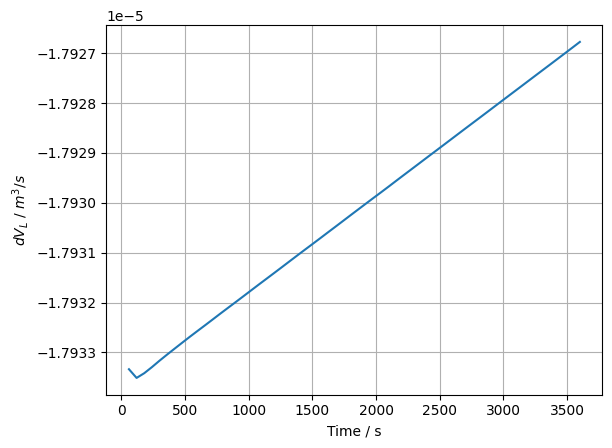

In [48]:
plt.plot(df_evap['Time'],df_evap['dV_L'],df_evap2['Time'],df_evap2['dV_L'])
plt.legend(['Sphere','Cylinder'])
plt.grid(True)
plt.xlabel('Time / s')
plt.ylabel('$dV_L$ / $m^3/s$')
plt.figure()
plt.plot(df_evap['Time'][1:],df_evap['dV_L'][1:])
plt.xlabel('Time / s')
plt.ylabel('$dV_L$ / $m^3/s$')
plt.grid(True)
plt.figure()
plt.plot(df_evap2['Time'][1:],df_evap2['dV_L'][1:])
plt.xlabel('Time / s')
plt.ylabel('$dV_L$ / $m^3/s$')
plt.grid(True)

In [49]:
assert(df_evap['Time']==df_evap2['Time']).all()

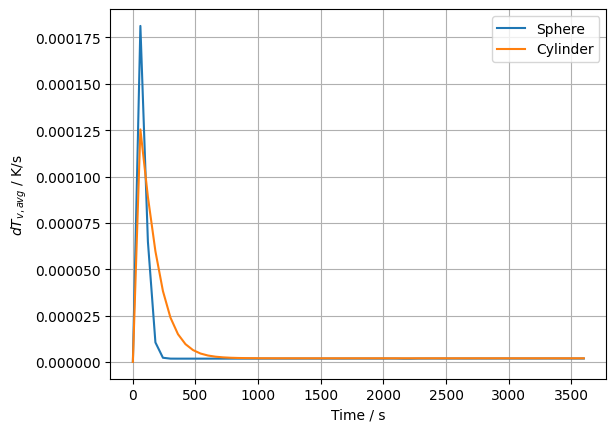

In [50]:
plt.plot(df_evap['Time'],df_evap['dTV_avg'])
plt.plot(df_evap2['Time'],df_evap2['dTV_avg'])
plt.grid(True)
plt.xlabel('Time / s')
plt.ylabel('$dT_{v, avg}$ / K/s')
plt.legend(['Sphere','Cylinder'])

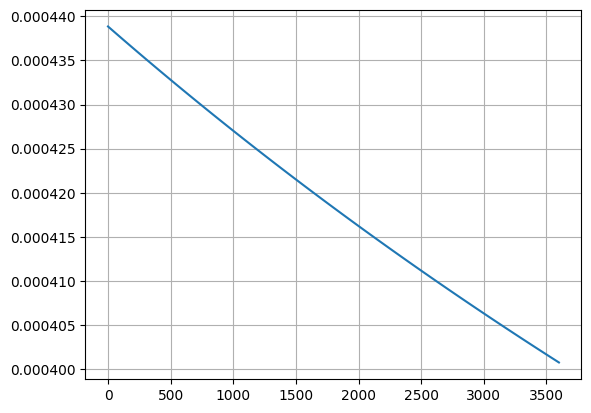

In [51]:
plt.plot(small_tank1.data['Time'],small_tank1.data['vz'])
plt.grid(True)

In [52]:
df_evap.head()

,Time,Tv_avg,rho_V_avg,Q_VL,Q_L,Q_V,V_L,B_L,BOG,drho_V_avg,...,vz_avg,vz,LF,dTV_avg,Q_Vw,Pressure,flux_v,flux_l,total_flux,SCHM BOG
0,0,20.866191,1.516480,-5.829143e-15,422.073265,66.387639,4.645500,0.001087,0.001087,0.000000e+00,...,0.000735,0.000439,0.950000,0.000000,63.068257,117000.000000,35.149065,35.041485,35.056068,46.243856
1,60,20.881255,1.515836,9.741611e-03,421.941642,66.516217,4.644572,0.001087,0.001066,-1.073598e-05,...,0.000734,0.000438,0.949810,0.000181,63.190406,116641.631630,35.147203,35.041492,35.055849,45.358446
2,120,20.887938,1.515192,9.761237e-03,421.810242,66.646258,4.643644,0.001087,0.001065,-6.250033e-06,...,0.000733,0.000437,0.949620,0.000065,63.313945,116622.518776,35.146237,35.041498,35.055752,45.311552
3,180,20.889037,1.515086,9.786855e-03,421.679062,66.777206,4.642715,0.001087,0.001064,-1.011704e-06,...,0.000731,0.000437,0.949431,0.000011,63.438346,116572.638450,35.145869,35.041504,35.055735,45.256140
4,240,20.889199,1.515071,9.811550e-03,421.548102,66.908125,4.641787,0.001087,0.001064,-2.162859e-07,...,0.000730,0.000436,0.949241,0.000002,63.562718,116517.939364,35.145603,35.041510,35.055732,45.247180


In [53]:
df_evap2.head()

,Time,Tv_avg,rho_V_avg,Q_VL,Q_L,Q_V,V_L,B_L,BOG,drho_V_avg,dV_L,z,vz,LF,dTV_avg,Q_Vw,SCHM BOG
0,0,20.866191,1.517058,-1.115908e-14,430.881547,138.378762,4.645500,0.001533,0.001533,0.000000,0.000000,1.333601,0.000238,0.95000,0.000000,131.459824,65.219678
1,60,20.874906,1.516446,3.881748e-02,430.809975,138.446668,4.644424,0.001533,0.001509,-0.000010,-0.000018,1.333292,0.000238,0.94978,0.000125,131.524335,64.172399
2,120,20.881241,1.515835,4.525991e-02,430.738401,138.515574,4.643348,0.001533,0.001508,-0.000009,-0.000018,1.332983,0.000238,0.94956,0.000089,131.589795,64.156504
3,180,20.885585,1.515416,4.698934e-02,430.666828,138.585315,4.642272,0.001533,0.001508,-0.000006,-0.000018,1.332674,0.000238,0.94934,0.000060,131.656049,64.127014
4,240,20.888402,1.515144,4.771773e-02,430.595255,138.655696,4.641196,0.001533,0.001507,-0.000004,-0.000018,1.332365,0.000238,0.94912,0.000038,131.722911,64.105193


In [54]:
df_evap[-5:]

,Time,Tv_avg,rho_V_avg,Q_VL,Q_L,Q_V,V_L,B_L,BOG,drho_V_avg,...,vz_avg,vz,LF,dTV_avg,Q_Vw,Pressure,flux_v,flux_l,total_flux,SCHM BOG
56,3360,20.894788,1.514533,0.011044,415.012474,73.442048,4.593537,0.001086,0.001063,-1.761204e-07,...,0.000692,0.000403,0.939374,0.000002,69.769945,114137.649434,35.133706,35.041826,35.055610,45.216956
57,3420,20.894897,1.514522,0.011067,414.891591,73.562896,4.592610,0.001086,0.001063,-1.759111e-07,...,0.000691,0.000402,0.939184,0.000002,69.884751,114099.555119,35.133505,35.041832,35.055607,45.216403
58,3480,20.895007,1.514512,0.011090,414.770874,73.683578,4.591682,0.001086,0.001063,-1.758652e-07,...,0.000690,0.000402,0.938994,0.000002,69.999399,114061.702254,35.133304,35.041838,35.055605,45.215852
59,3540,20.895116,1.514501,0.011113,414.650321,73.804096,4.590755,0.001086,0.001063,-1.756607e-07,...,0.000689,0.000401,0.938805,0.000002,70.113891,114024.086762,35.133104,35.041844,35.055602,45.215300
60,3600,20.895226,1.514490,0.011135,414.529931,73.924450,4.589827,0.001086,0.001063,-1.755666e-07,...,0.000688,0.000401,0.938615,0.000002,70.228228,113986.707180,35.132905,35.041850,35.055600,45.214750


In [55]:
df_evap2[-5:]

,Time,Tv_avg,rho_V_avg,Q_VL,Q_L,Q_V,V_L,B_L,BOG,drho_V_avg,dV_L,z,vz,LF,dTV_avg,Q_Vw,SCHM BOG
56,3360,20.898528,1.514170,0.048434,426.874106,142.372214,4.585254,0.001533,0.001506,-1.882010e-07,-0.000018,1.316306,0.000238,0.93768,0.000002,135.253603,64.051728
57,3420,20.898646,1.514159,0.048428,426.802557,142.443704,4.584178,0.001533,0.001506,-1.883334e-07,-0.000018,1.315997,0.000238,0.93746,0.000002,135.321519,64.051408
58,3480,20.898763,1.514148,0.048427,426.731010,142.515194,4.583102,0.001533,0.001506,-1.882284e-07,-0.000018,1.315688,0.000238,0.93724,0.000002,135.389434,64.051085
59,3540,20.898881,1.514137,0.048431,426.659462,142.586683,4.582027,0.001533,0.001506,-1.883294e-07,-0.000018,1.315379,0.000238,0.93702,0.000002,135.457349,64.050765
60,3600,20.898998,1.514125,0.048420,426.587915,142.658172,4.580951,0.001533,0.001506,-1.886624e-07,-0.000018,1.315071,0.000238,0.93680,0.000002,135.525264,64.050447


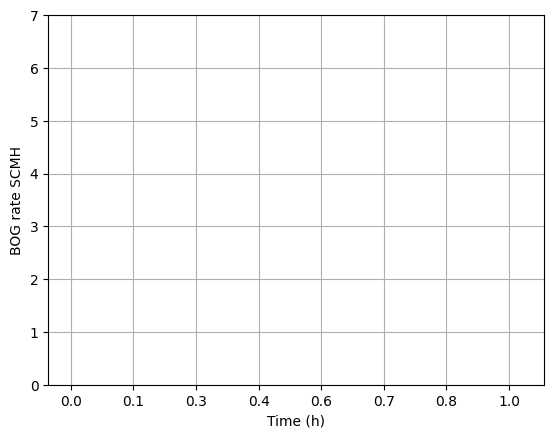

In [56]:
plt.plot(df_evap['Time'],df_evap['SCHM BOG'])
plt.ylim((0,7))
plt.ylabel('BOG rate SCMH')
plt.xlabel('Time (h)')
loc = plt.xticks()[0]
plt.xticks([round(i) for i in loc[1:-1]],[round(i/3600,1) for i in loc[1:-1]])
plt.grid(True)

#### References



Hasan, M., Lin, C. and Van Dresar, N. (1991). Self-Pressurization of a Flightweight Liquid Hydrogen Storage Tank Subjected to Low Heat Flux. [online] Available at: https://ntrs.nasa.gov/api/citations/19910011011/downloads/19910011011.pdf [Accessed 2 Jul. 2024].

Wang, Z. and Mérida, W. (2024). Thermal performance of cylindrical and spherical liquid hydrogen tanks. International Journal of Hydrogen Energy, 53, pp.667–683. doi:https://doi.org/10.1016/j.ijhydene.2023.11.287.